# 뱀 (https://www.acmicpc.net/problem/3190)

'Dummy' 라는 도스게임이 있다. 이 게임에는 뱀이 나와서 기어다니는데, 사과를 먹으면 뱀 길이가 늘어난다. 뱀이 이리저리 기어다니다가 벽 또는 자기자신의 몸과 부딪히면 게임이 끝난다.

게임은 NxN 정사각 보드위에서 진행되고, 몇몇 칸에는 사과가 놓여져 있다. 보드의 상하좌우 끝에 벽이 있다. 게임이 시작할때 뱀은 맨위 맨좌측에 위치하고 뱀의 길이는 1 이다. 뱀은 처음에 오른쪽을 향한다.

뱀은 매 초마다 이동을 하는데 다음과 같은 규칙을 따른다.

먼저 뱀은 몸길이를 늘려 머리를 다음칸에 위치시킨다.
만약 이동한 칸에 사과가 있다면, 그 칸에 있던 사과가 없어지고 꼬리는 움직이지 않는다.
만약 이동한 칸에 사과가 없다면, 몸길이를 줄여서 꼬리가 위치한 칸을 비워준다. 즉, 몸길이는 변하지 않는다.
사과의 위치와 뱀의 이동경로가 주어질 때 이 게임이 몇 초에 끝나는지 계산하라.


# 입력
첫째 줄에 보드의 크기 N이 주어진다. (2 ≤ N ≤ 100) 다음 줄에 사과의 개수 K가 주어진다. (0 ≤ K ≤ 100)

다음 K개의 줄에는 사과의 위치가 주어지는데, 첫 번째 정수는 행, 두 번째 정수는 열 위치를 의미한다. 사과의 위치는 모두 다르며, 맨 위 맨 좌측 (1행 1열) 에는 사과가 없다.

다음 줄에는 뱀의 방향 변환 횟수 L 이 주어진다. (1 ≤ L ≤ 100)

다음 L개의 줄에는 뱀의 방향 변환 정보가 주어지는데,  정수 X와 문자 C로 이루어져 있으며. 게임 시작 시간으로부터 X초가 끝난 뒤에 왼쪽(C가 'L') 또는 오른쪽(C가 'D')로 90도 방향을 회전시킨다는 뜻이다. X는 10,000 이하의 양의 정수이며, 방향 전환 정보는 X가 증가하는 순으로 주어진다.

# 출력 (몇 초에 끝나는지 출력)
6

3

3 4

2 5

5 3

3

3 D

15 L

17 D

답 : 9

In [1]:
# 뱀
from collections import deque

In [2]:
n = int(input()) # 2 ~ 100 보드 크기
k = int(input()) # 0 ~ 100 사과 개수

 6
 3


In [3]:
# NxN의 판에서 뱀이 움직이기 때문에 맵을 만들어준다.
# 1은 벽 0 은 움직일 수 있는 곳
board = [[1]*(n+2)] + [[1]+[0]*n+[1] for _ in range(n)] + [[1]*(n+2)]
print(board)

[[1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1]]


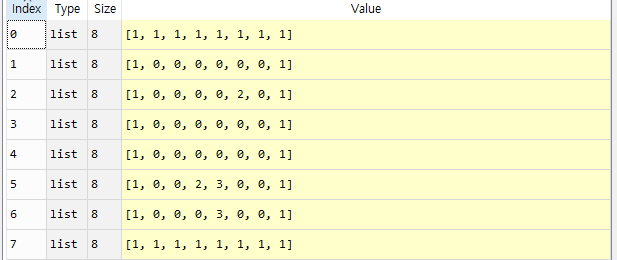!

In [4]:
for i in range(k):
    x,y = map(int, input().split(' '))
    board[x][y] = 2 # 사과 위치는 2로

 3 4
 2 5
 5 3


In [5]:
# 뱀의 방향 변환 횟수
direction = int(input())
# 뱀의 방향 변환 정보
direction_arr = []
for _ in range(direction):
    direction_arr.append(list(map(str, input().split(' '))))
for da in direction_arr:
    da[0] = int(da[0])
#direction_arr = list(map(lambda x:[int(x[0]), x[1]], [input().split() for _ in range(direction)]))


 3
 3 D
 15 L
 17 D


In [6]:
time = 0 # 첫 시작은 일단 0초부터
x,y = 1,1 # 뱀의 첫 위치
direction = {0:(-1,0), 1:(0,1), 2:(1,0), 3:(0,-1)} ## 0:북 1:동 2:남 3:서
d = 1 # 현재 방향은 오른쪽 (동쪽)
snake_arr = deque([[1,1]]) ## 뱀의 위치를 큐로 나타낸다.

# board -> 0:빈공간, 1:벽, 2:사과, 3:뱀
board[1][1] = 3 ## 처음 뱀이 (1,1)에 존재하므로

# 이동한 후에 뱀 머리의 위치가 벽이거나, 자신의 몸일 경우 stop
while(1):
    # 일단 뱀의 머리를 이동시킨다. 바라보고 있는 방향으로.
    x = x + direction[d][0]
    y = y + direction[d][1]
    
    # 이동한 곳에 사과가 있다.
    if board[x][y] == 2:
        board[x][y] = 3 # 이제는 사과 대신 뱀의 머리가 위치한다.
        snake_arr.append([x, y]) # snake_array의 맨 오른쪽 원소가 머리, 왼쪽이 꼬리부분이다.
        time = time + 1
    # 이동한 곳엔 사과가 없고, 그냥 빈 공간이다.
    elif board[x][y] == 0:
        board[x][y] = 3
        snake_arr.append([x,y])
        del_x, del_y = snake_arr.popleft() # 뱀의 전체 길이는 변하지 않아야 하기 때문에 꼬리를 제거
        board[del_x][del_y] = 0
        time = time + 1
    # 나머지는 이동한 위치가 벽(=1)이거나 자신의 몸(=3)이므로 stop
    else:
        time = time + 1
        break
    # 뱀의 방향 전환 정보
    if len(direction_arr) != 0:
        if direction_arr[0][0] == time:
            if direction_arr[0][1] == 'L': # 왼쪽으로 90도 회전
                d = (d-1)%4
            elif direction_arr[0][1] =='D': # 오른쪽으로 90도 회전
                d = (d+1)%4
            del direction_arr[0] # 방향 전환했으므로 제거

In [7]:
print(time)

9
